In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(font_scale = 2)

%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
activation = 'relu'
batch_size = 128
neurons_number = 64
epochs = 20
optimize = 'Adam'

In [40]:
# build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(neurons_number, input_shape=(1,), name='input', activation=activation))

for i in range(30):
    
    model.add(keras.layers.Dense(neurons_number, activation=activation))
    # model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(neurons_number, activation=activation))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, activation=activation))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, name='output'))
# summary of the model
model.summary()
model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mse'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 64)                128       
_________________________________________________________________
dense_424 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_425 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_426 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_427 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_428 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_429 (Dense)            (None, 64)               

In [41]:
X_train = np.linspace(0, 0.8, num=10000)
Y_train = X_train

In [42]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/20
63/63 [==============================] - 1s 5ms/step - loss: 0.0793 - mse: 0.0793 - val_loss: 8.2353e-04 - val_mse: 8.2353e-04
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: 6.6894e-04 - mse: 6.6894e-04 - val_loss: 3.5376e-05 - val_mse: 3.5376e-05
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 6.7966e-06 - mse: 6.7966e-06 - val_loss: 1.9474e-05 - val_mse: 1.9474e-05
Epoch 4/20
63/63 [==============================] - 0s 3ms/step - loss: 2.2057e-05 - mse: 2.2057e-05 - val_loss: 2.2667e-05 - val_mse: 2.2667e-05
Epoch 5/20
63/63 [==============================] - 0s 3ms/step - loss: 8.4560e-06 - mse: 8.4560e-06 - val_loss: 6.2970e-05 - val_mse: 6.2970e-05
Epoch 6/20
63/63 [==============================] - 0s 3ms/step - loss: 1.0398e-04 - mse: 1.0398e-04 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 7/20
63/63 [==============================] - 0s 3ms/step - loss: 4.8764e-04 - mse: 4.8764e-04 - val_loss: 3.7974e-05 - val_mse: 3.797

In [43]:
X_test = np.linspace(0, 0.8, num=333)
Y_test = X_test

loss, mse = model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 411us/step - loss: 6.4191e-05 - mse: 6.4191e-05


In [44]:
grid = np.linspace(0, 1.0, 150)
predicted = model.predict(grid).reshape((150,))

references = pd.DataFrame({'X': grid, 'Y_reference': grid})
predictions = pd.DataFrame({'X': grid, 'Y_predicted': predicted})

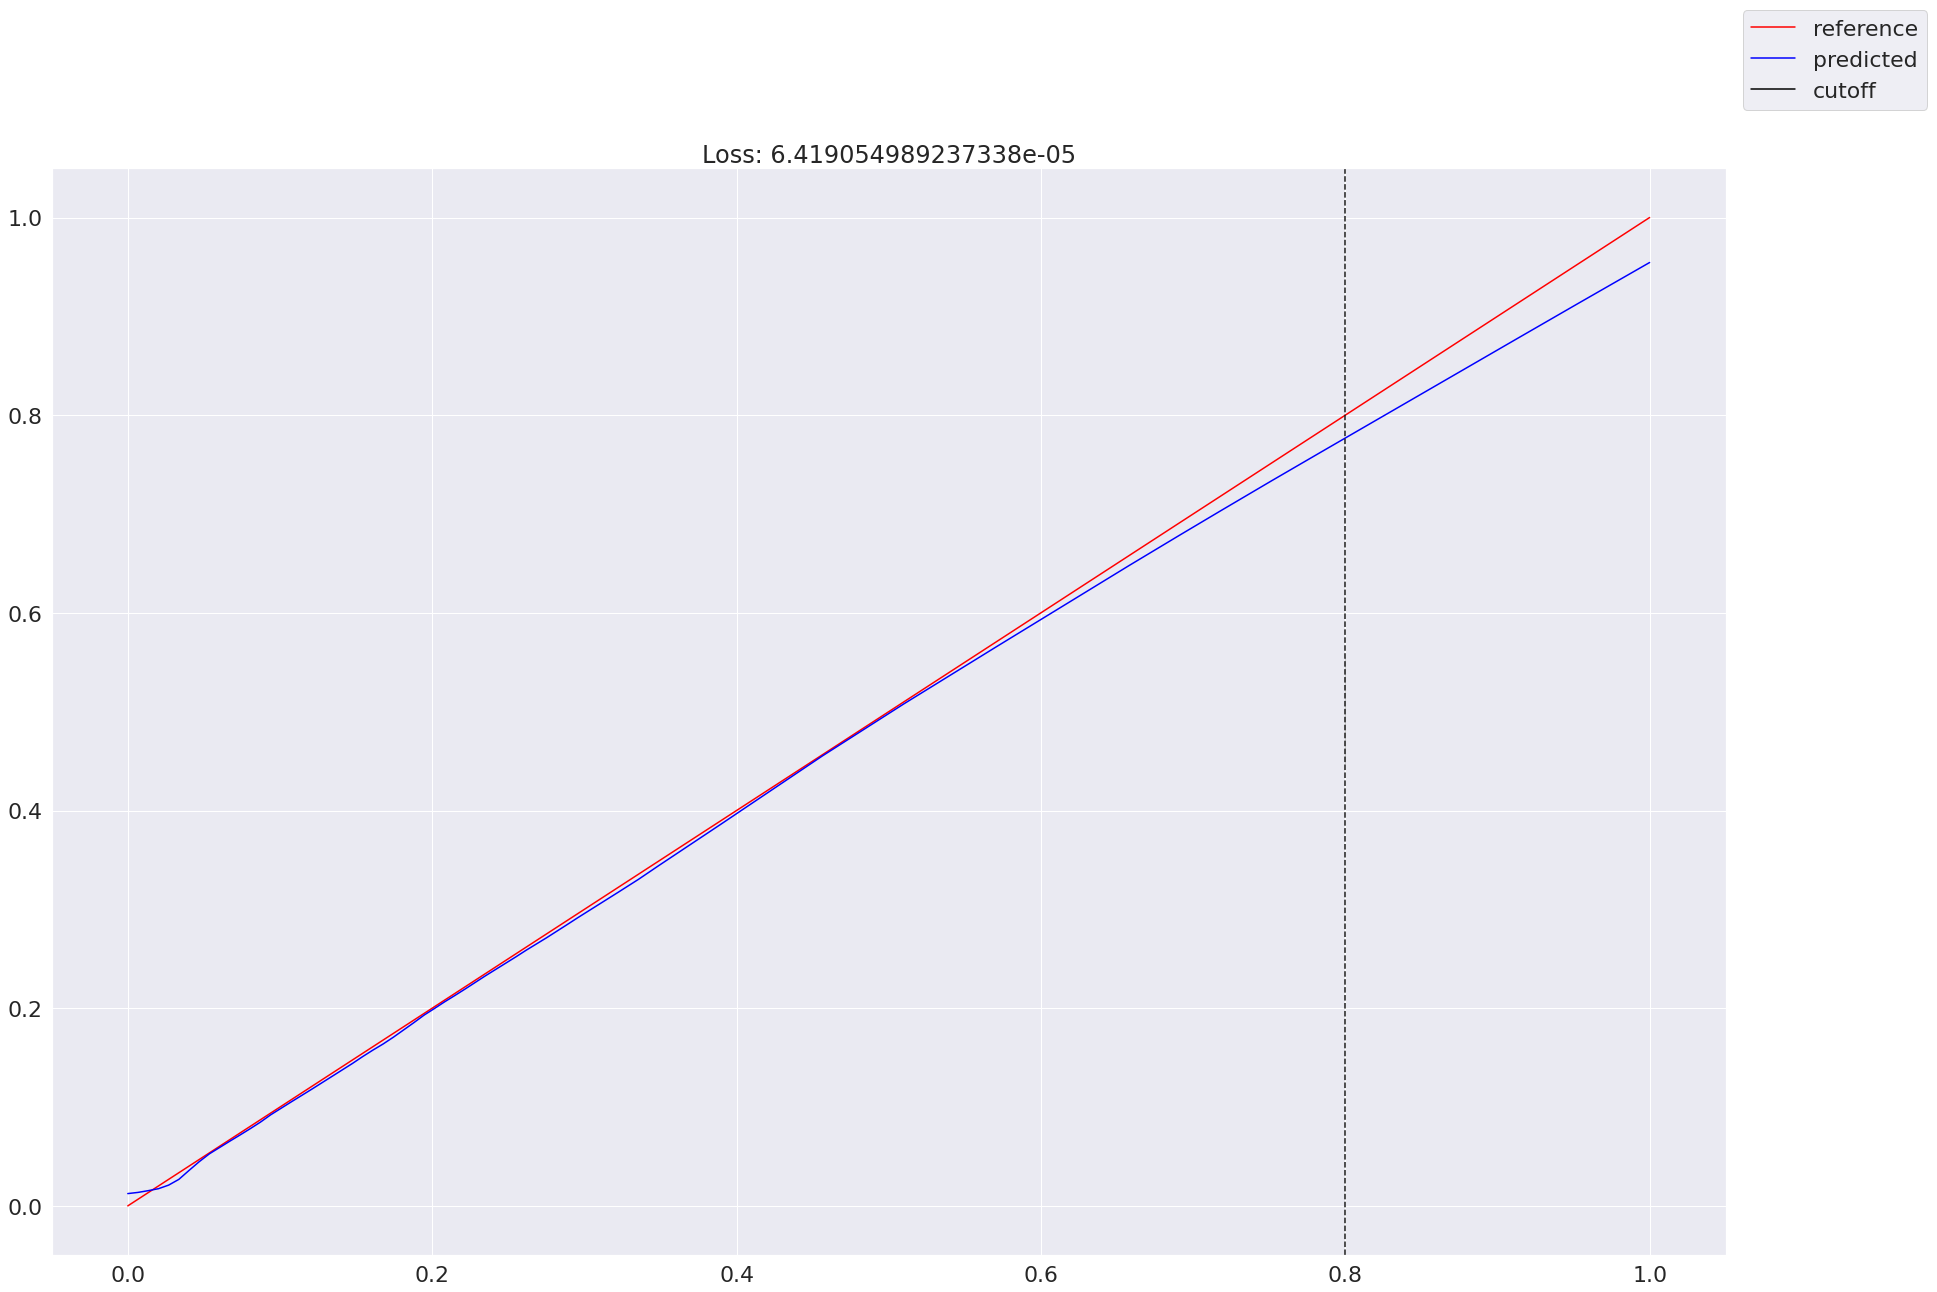

In [46]:
dims = (30, 20)
fig, ax = pyplot.subplots(figsize=dims)
predicted = model.predict(grid).reshape((150,))

sns.lineplot(x=grid, y=grid, color="red")
sns.lineplot(data=predictions, x=grid, y=predicted, color="blue")
sns.lineplot(data=predictions, x=np.ones(150) * 0.8, y=np.linspace(-0.1, 1.1, 150), color="black")
plt.axvline(0.8, color='k', linestyle='--')
ax.set_title("Loss: {}".format(loss))
fig.legend(labels=['reference', 'predicted', 'cutoff'])